# Pythonで基礎から機械学習 単回帰分析

データ分析の基礎中の基礎の単回帰分析をPythonを使って手を動かしながら実行していきます。

単回帰はExcelを使えば簡単にできてしまうのですが、もっと複雑な機械学習手法の基礎となるので、Pythonを使ったデータ分析の練習としてあえてPythonを使います。

scikit-learnを使えば一発なのですが、Numpyを使って数値をこねくり回しながら意味を確認していきます。

単回帰分析に関しては、以下サイトがわかりやすかったです。

https://www.albert2005.co.jp/knowledge/statistics_analysis/multivariate_analysis/single_regression

他の参考書籍は以下です。


その他、コードの実装で参考にしたサイトは、本記事の最後に列挙します。

## データの読み込みと可視化

ここでは、pandasというデータ処理を行うライブラリとmatplotlibというデータを可視化するライブラリを使って、分析するデータがどんなデータ化を確認します。

まずは、pandasで分析するcsvファイルを読み込み、ファイルの中身の冒頭部分を確認します

pandas, matplotlibなどのライブラリの使い方に関しては、以下ブログ記事を参照下さい。

https://karaage.hatenadiary.jp/entry/2017/05/25/073000

In [1]:
import pandas as pd

df = pd.read_csv('data/karaage_data.csv')
df.head()

,x,y
0,1,2
1,2,3
2,5,2
3,10,3
4,28,4


このデータは、お祭りの来場者に対する、からあげ屋さんの出店の数という架空のデータです。

xが来場者[万人] yがからあげ屋さんの出店の数を表しています。例えば、1万人のお祭りだとからあげ屋さんは2つ。10万人のお祭りだとからあげ屋さんは3つという感じです。

x列、y列にある値を x, y に格納します。今後この、x, y の値を分析していきます。

In [2]:
x = df[['x']]
y = df[['y']]

まずは、x, yをグラフで可視化します。matplotlibというライブラリを使います。

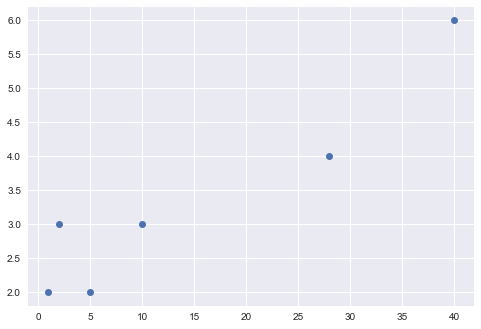

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(x, y, 'o')
plt.show()

お祭りの来場者(x)が増えるほど、からあげの出店数が増えているのがなんとなく見えますね。

## scikit-learnを使った単回帰分析


早速、単回帰分析をしていきます。まずは、scikit-learnというライブラリでPythonの実力を体感します。

In [4]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

これで、完了です。一瞬ですね。早速結果を可視化します

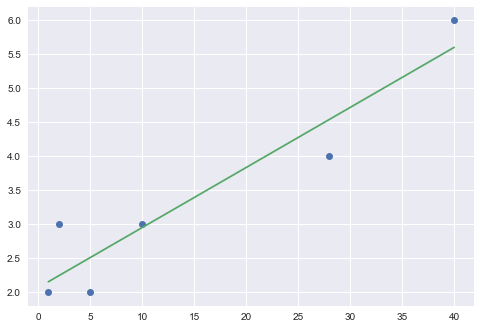

モデル関数の回帰変数 w1: 0.088
モデル関数の切片 w2: 2.066
y= 0.088x + 2.066
決定係数 R^2：  0.8844953173777316


In [5]:
import matplotlib.pyplot as plt
import seaborn

plt.plot(x, y, 'o')
plt.plot(x, model_lr.predict(x), linestyle="solid")
plt.show()

print('モデル関数の回帰変数 w1: %.3f' %model_lr.coef_)
print('モデル関数の切片 w2: %.3f' %model_lr.intercept_)
print('y= %.3fx + %.3f' % (model_lr.coef_ , model_lr.intercept_))
print('決定係数 R^2： ', model_lr.score(x, y))

単回帰ができてしまいました。

これで完了！でも良いのですが、それぞれの数字の意味や求め方をNumpyを使って計算していきましょう。

## Numpyを使った単回帰分析

ここから、Numpyを使って単回帰分析で求めた値を計算し、その意味を解きほぐしていきましょう。

まずは、pandasで読み込んだデータをnumpyのデータ形式に変換します。

x, y と x, yを結合した行列を、それぞれ np_x, np_y, np_xy という numpy の配列として読み込みます。

In [6]:
import numpy as np
np_x = x.values
np_x = np_x.T[0]
np_y = y.values
np_y = np_y.T[0]
np_xy = np.stack([np_x, np_y])

print('np_x:', np_x)
print('np_y:', np_x)
print('np_xy:')
print(np_xy)

np_x: [ 1  2  5 10 28 40]
np_y: [ 1  2  5 10 28 40]
np_xy:
[[ 1  2  5 10 28 40]
 [ 2  3  2  3  4  6]]


単回帰分析は、以下のサイトによると、モデル関数の回帰変数 w1 が x,yの共分散(Sxy)/ xの分散(Sxx) で求められるので、まずは xの分散(Sxx)とx,yの共分散(Sxy)を求めていきます

https://www.albert2005.co.jp/knowledge/statistics_analysis/multivariate_analysis/single_regression

Numpyのconvメソッドにx,yを結合した行列を引数で渡して返ってくる行列の[0][0]がxの分散、[0][1], [1][0]の要素がx,yの共分散, [1][1]の要素がyの分散になります。

In [7]:
s_xy = np.cov(np_xy, rowvar=1, bias=1)

print(s_xy)

[[213.55555556  18.88888889]
 [ 18.88888889   1.88888889]]


x,yの分散は np.var(np_x), np.var(np.y)でも求められます。同じ値になることを確認します。

In [8]:
s_xx = np.var(np_x)
s_yy = np.var(np_y)

print('S_xx : %.3f' %s_xx)
print('S_yy : %.3f' %s_yy)

S_xx : 213.556
S_yy : 1.889


w1を計算します。scikit-learnで計算した値と同じになります。

In [9]:
w_1 = s_xy[0][1] / s_xx
print('w1 : %.3f' %w_1)

w1 : 0.088


w0を計算します。w0は先ほど求めたw1とxとyの平均値を使って求めることができます。

In [10]:
np_x_mean = np_x.mean()
np_y_mean = np_y.mean()

w_0 = np_y_mean - w_1 * np_x_mean
print('w0 : %.3f' %w_0)

w0 : 2.066


続いて決定係数 R を求めます。Rが1に近いほど、xがyを説明できているということになるそうです。

決定変数は、全変動(Sall)、回帰変動(Sreg), 残差変動(Sres)から計算できます。

Sall, Sreg, Sresには以下のような関係があります。

Sall = Sreg + Sres

R = Sreg/Sall

R^2 = r^2

詳細は、以下サイトを参照下さい。ここでは、それぞれをNumpyで計算していきます。

- https://mathtrain.jp/sanhendo
- https://mathtrain.jp/ketteikeisu

Sallの計算

In [11]:
s_all = 0

for y_i in np_y:
    s_all += (y_i - np_y_mean)**2


print(s_all / np_y.size)

1.888888888888889


Sregの計算

In [12]:
s_reg = 0

for x_i in np_x:
    s_reg += (model_lr.predict(x_i.reshape(1,-1))[0][0] - np_y_mean)**2

print(s_reg / np_x.size)

1.6707133772690488


Sresの計算

In [13]:
s_res = 0

for x_i, y_i in zip(np_x, np_y):
    s_res += (y_i - model_lr.predict(x_i.reshape(1,-1))[0][0])**2 

print(s_res / np_x.size)

0.21817551161984047


Sall = Sreg + Sres の確認

In [14]:
print('Sall: %.3f' %s_all)
print('Sreg + Sres: %.3f' %(s_reg + s_res))

Sall: 11.333
Sreg + Sres: 11.333


R^2 = Sreg / Sall より R2を計算

In [15]:
R2 = s_reg / s_all
print('R^2: %.3f' %R2)

R^2: 0.884


S_xx, S_yy, S_xyから求められる相関係数rという値があるのですが、決定係数と相関係数の間には以下のような関係があります。

R^2 = r^2

詳細は以下参照下さい。

- https://sci-pursuit.com/math/statistics/correlation-coefficient.html
- https://mathtrain.jp/ketteikeisu

ここではNumpyでrを求め、R^2 = r^2 となることを確認します。

In [16]:
r = s_xy[0][1] / (s_xx * s_yy)**(0.5)
r2 = r**2
print('r2: %.3f' %r2)
print('R^2: %.3f' %R2)

r2: 0.884
R^2: 0.884


相関関数は、Numpyのcorrcoefというメソッドを使っても計算できます。

In [17]:
np.corrcoef(np_xy)

array([[1.        , 0.94047611],
       [0.94047611, 1.        ]])

[0][1]と[1][0]の要素が相関関数です。2乗してR^2と等しくなることを確認します。

In [18]:
np.corrcoef(np_xy)[0][1]**2

0.8844953173777311

## 統計的な解釈

次に、統計的な解釈を行います。ここは、statsmodelというライブラリを使って一気にやってしまいます。

In [19]:
import statsmodels.api as sm

x_add_const = sm.add_constant(x)
model_sm = sm.OLS(y, x_add_const).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     30.63
Date:                Fri, 30 Aug 2019   Prob (F-statistic):            0.00521
Time:                        23:56:04   Log-Likelihood:                -3.9463
No. Observations:                   6   AIC:                             11.89
Df Residuals:                       4   BIC:                             11.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0656      0.327      6.314      0.0

/Users/karaage/.pyenv/versions/anaconda3-4.4.0/envs/ml/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/karaage/.pyenv/versions/anaconda3-4.4.0/envs/ml/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


今まで求めた、モデル関数の回帰変数 w1 0.088, モデル関数の切片 w2 2.066, 決定係数 R^2 0.0884に加え、今回生成した線形モデルに対する、様々な統計的な評価値が算出されています。

検定とか、信頼区間と言われるようなものです。そうです、よく分かっていません。ごめんなさい。

ざっくりとした見方としては、 ここでは const が切片、 xが回帰変数を意味しています。

それぞれの P>|t| は 0 に近いほど妥当性があるということになります。一般的には0.05以下なら妥当性があるとするらしいです。今回は、0.003と0.005なので十分小さい値です。

また、信頼区間は constが 1.157〜2.974、 xが0.044〜0.133となっていますが、これはだいたい（95%以上）は、この範囲の中にデータが収まっているよという範囲です。


## 他のデータセットでの分析

他のデータセットでの分析にも挑戦してみましょう。

以下のコマンドで、データ分析の例としてよく使われる、UC バークレー大学の UCI Machine Leaning Repository にて公開されている、「Wine Quality Data Set (ワインの品質)」の赤ワインのデータセットをダウンロードできます。

In [20]:
!wget http://pythondatascience.plavox.info/wp-content/uploads/2016/07/winequality-red.csv

--2019-08-30 23:56:05--  http://pythondatascience.plavox.info/wp-content/uploads/2016/07/winequality-red.csv
pythondatascience.plavox.info (pythondatascience.plavox.info) をDNSに問いあわせています... 13.230.11.70, 54.249.75.254
pythondatascience.plavox.info (pythondatascience.plavox.info)|13.230.11.70|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 301 Moved Permanently
場所: https://pythondatascience.plavox.info/wp-content/uploads/2016/07/winequality-red.csv [続く]
--2019-08-30 23:56:05--  https://pythondatascience.plavox.info/wp-content/uploads/2016/07/winequality-red.csv
pythondatascience.plavox.info (pythondatascience.plavox.info)|13.230.11.70|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 84199 (82K) [application/octet-stream]
`winequality-red.csv.1' に保存中

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s 時間 0.02s      

2019-08-30 23:56:05 (4.76 MB/s) - `winequality-red.csv.1' へ保存完了 [84199/84199]



以下で、pandasでデータを読み込み

In [21]:
import pandas as pd

df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
x = df[['density']]
y = df[['alcohol']]

## 参考

- https://tanuhack.com/python/basic-data-analysis/
- https://qiita.com/ysdyt/items/9ccca82fc5b504e7913a
- https://qiita.com/nanairoGlasses/items/f2b9c0eccf54ff262c02
- http://www.ec.kansai-u.ac.jp/user/amatsuo/pdfstatecon/karich13-2010a.pdf
- https://mathtrain.jp/sanhendo
- https://to-kei.net/estimator/unbiasedness/
- https://qiita.com/kibarashi1924/items/d25ec2476221626c9f3d
- https://www.case-k.jp/entry/2018/06/24/224550
- https://qiita.com/pshiko/items/17454ae238534444b222
- https://blog.shikoan.com/deeplearning-is-not-ols/
- https://pythondatascience.plavox.info/scikit-learn/線形回帰
- http://ailaby.com/python_cov/
- https://deepage.net/features/numpy-cov.html
- https://deepage.net/features/pandas-numpy.html
- https://toukei.link/programmingandsoftware/statistics_by_python/python_regression/
- https://omedstu.jimdo.com/2019/02/11/matplotlibのみで線形回帰の信頼区間を描画する/
- https://momonoki2017.blogspot.com/2018/03/python10.html